In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Base de datos original, versión PCA

In [2]:
ds = pd.read_csv("../datasets/iris_plant/PCA_iris_plant.csv")

## aplicando validación cruzada 75-25

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test = train_test_split(ds,test_size=.25)

In [14]:
#aqui probar train y test.
x_train.head()

,x1,x2,variety
90,0.464800,-0.670712,1
62,0.264977,-0.550036,1
71,0.357888,-0.068925,1
78,0.813291,-0.163350,1
36,-2.625238,0.599370,0


## dividiendo el conjunto de datos de entrenamiento
Se dividira el conjunto en setosa, virginica y versicolor

In [22]:
setosa = x_train[x_train["variety"]==0]
versicolor = x_train[x_train["variety"]==1]
virginica = x_train[x_train["variety"]==2]

In [23]:
setosa.head()

,x1,x2,variety
36,-2.625238,0.599370,0
26,-2.468820,0.130951,0
28,-2.639535,0.312040,0
6,-2.820538,-0.089461,0
19,-2.587986,0.513560,0


Text(0.5,1,'Conjunto de entrenamiento')

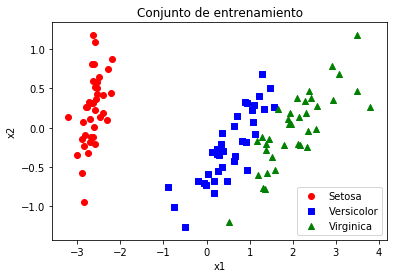

In [24]:
plt.scatter(x=setosa["x1"],y=setosa["x2"],color='r',marker='o')
plt.scatter(x=versicolor["x1"],y=versicolor["x2"],color='b',marker='s')
plt.scatter(x=virginica["x1"],y=virginica["x2"],color='g',marker='^')
plt.legend(["Setosa","Versicolor","Virginica"])
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Conjunto de entrenamiento")

## nuevos conjuntos clase principal y clase nube

In [25]:
principal = setosa
nube=versicolor.append(virginica)

## cambiando target de principal y nube

In [31]:
principal["variety"] = principal["variety"].replace([0],1)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [35]:
nube["variety"] = nube["variety"].replace([1],0)
nube["variety"] = nube["variety"].replace([2],0)

Text(0,0.5,'x2')

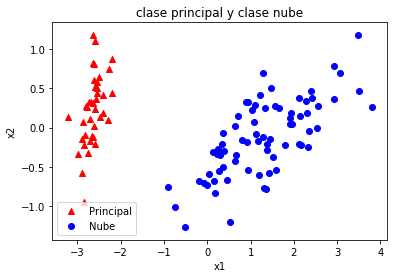

In [47]:
plt.scatter(x=principal["x1"],y=principal["x2"],color='red',marker='^')
plt.scatter(x=nube["x1"],y=nube["x2"],color='blue',marker='o')
plt.legend(["Principal","Nube"])
plt.title("clase principal y clase nube")
plt.xlabel("x1")
plt.ylabel("x2")

## punto medio entre clase principal y clase nube

In [48]:
pMedio = (principal.mean()+nube.mean())/2

In [49]:
print(pMedio)

x1        -0.679000
x2         0.055016
variety    0.500000
dtype: float64


Text(0,0.5,'x2')

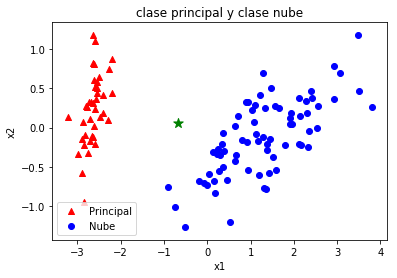

In [53]:
plt.scatter(x=principal["x1"],y=principal["x2"],color='red',marker='^')
plt.scatter(x=nube["x1"],y=nube["x2"],color='blue',marker='o')
plt.scatter(x=pMedio["x1"],y=pMedio["x2"],color='green',marker='*',s=100)
plt.legend(["Principal","Nube"])
plt.title("clase principal y clase nube")
plt.xlabel("x1")
plt.ylabel("x2")

## restando clase principal y clase nube

In [57]:
entrenamiento = principal.append(nube)
print(entrenamiento)
#vm1 = principal-pMedio
#vm2 = nube-pMedio
#print('vm1',vm1)
#print('vm2',vm2)

           x1        x2  variety
36  -2.625238  0.599370        1
26  -2.468820  0.130951        1
28  -2.639535  0.312040        1
6   -2.820538 -0.089461        1
19  -2.587986  0.513560        1
2   -2.888991 -0.144949        1
47  -2.839462 -0.227946        1
9   -2.672756 -0.113774        1
31  -2.409932  0.410924        1
40  -2.770102  0.263528        1
4   -2.728717  0.326755        1
46  -2.538148  0.503771        1
30  -2.587398 -0.204318        1
44  -2.209489  0.436663        1
22  -3.215939  0.133468        1
3   -2.745343 -0.318299        1
23  -2.302733  0.098709        1
5   -2.280860  0.741330        1
35  -2.866242  0.069364        1
48  -2.543086  0.579410        1
21  -2.543705  0.432996        1
11  -2.612755  0.014730        1
39  -2.590006  0.229044        1
49  -2.703360  0.107706        1
18  -2.199820  0.872839        1
16  -2.623528  0.810680        1
14  -2.644750  1.178765        1
34  -2.636927 -0.121322        1
41  -2.849369 -0.940961        1
8   -2.886

In [58]:
xecoma = entrenamiento-pMedio
print(xecoma)

           x1        x2  variety
36  -1.946238  0.544354      0.5
26  -1.789820  0.075936      0.5
28  -1.960534  0.257024      0.5
6   -2.141537 -0.144477      0.5
19  -1.908986  0.458545      0.5
2   -2.209990 -0.199965      0.5
47  -2.160462 -0.282961      0.5
9   -1.993756 -0.168790      0.5
31  -1.730932  0.355909      0.5
40  -2.091102  0.208512      0.5
4   -2.049716  0.271739      0.5
46  -1.859148  0.448756      0.5
30  -1.908398 -0.259334      0.5
44  -1.530489  0.381648      0.5
22  -2.536939  0.078453      0.5
3   -2.066343 -0.373315      0.5
23  -1.623733  0.043693      0.5
5   -1.601859  0.686315      0.5
35  -2.187241  0.014349      0.5
48  -1.864085  0.524394      0.5
21  -1.864705  0.377981      0.5
11  -1.933755 -0.040286      0.5
39  -1.911006  0.174028      0.5
49  -2.024359  0.052691      0.5
18  -1.520820  0.817823      0.5
16  -1.944528  0.755664      0.5
14  -1.965750  1.123749      0.5
34  -1.957927 -0.176338      0.5
41  -2.170368 -0.995976      0.5
8   -2.207

In [71]:
sum_xecoma = xecoma[xecoma["variety"]==0.5]
sum_x1 = sum(sumx1["x1"])
sum_x2 = sum(sumx1["x2"])

In [88]:
memoria_1 = np.array([[sum_x1,sum_x2],[0,0]])
#print(memoria_1)

Text(0,0.5,'x2')

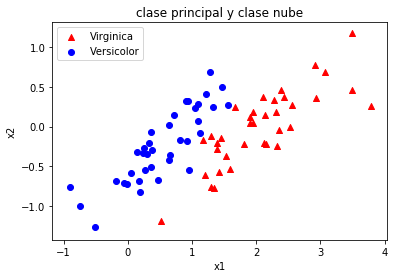

In [89]:
plt.scatter(x=virginica["x1"],y=virginica["x2"],color='red',marker='^')
plt.scatter(x=versicolor["x1"],y=versicolor["x2"],color='blue',marker='o')
plt.legend(["Virginica","Versicolor"])
plt.title("clase principal y clase nube")
plt.xlabel("x1")
plt.ylabel("x2")

In [83]:
principal_2 = pd.DataFrame()
nube_2 = pd.DataFrame()

In [84]:
principal_2 = principal_2.append(versicolor) 
nube_2 = nube_2.append(virginica)

In [85]:
pMedio_2 = (principal_2.mean()+nube_2.mean())/2

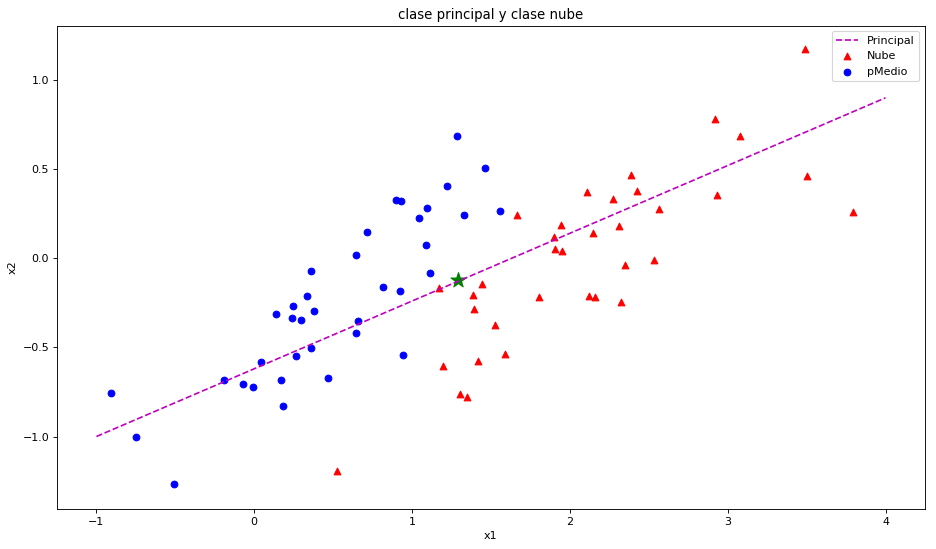

In [111]:
plt.figure(figsize=(14, 8), dpi=80)
plt.scatter(x=virginica["x1"],y=virginica["x2"],color='red',marker='^')
plt.scatter(x=versicolor["x1"],y=versicolor["x2"],color='blue',marker='o')
plt.scatter(x=pMedio_2["x1"],y=pMedio_2["x2"],color='green',marker='*',s=200)
plt.plot([-1,4], [-1.0,0.9],'m--')
plt.legend(["Principal","Nube","pMedio"])
plt.title("clase principal y clase nube")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()
#linea de codigo para guardar una figura en formato jpg
#plt.savefig('pic.png') 

In [91]:
entrenamiento_2  = principal_2.append(nube_2)

In [92]:
xecoma_2 = entrenamiento_2- pMedio_2
print(xecoma_2)

           x1        x2  variety
90  -0.827478 -0.546369     -0.5
62  -1.027302 -0.425694     -0.5
71  -0.934390  0.055418     -0.5
78  -0.478988 -0.039008     -0.5
81  -1.481901 -0.555944     -0.5
74  -0.577425  0.273399     -0.5
54  -0.204175  0.198933     -0.5
99  -0.993278 -0.224555     -0.5
88  -1.046321 -0.144182     -0.5
51  -0.359790  0.442676     -0.5
95  -0.960344 -0.088312     -0.5
82  -1.155850 -0.189690     -0.5
60  -1.800119 -1.141629     -0.5
56  -0.197218  0.407811     -0.5
97  -0.649703  0.142081     -0.5
89  -1.125865 -0.557584     -0.5
68  -0.347545 -0.418803     -0.5
55  -0.650609 -0.293904     -0.5
57  -2.041401 -0.880548     -0.5
77   0.265524  0.391838     -0.5
75  -0.392104  0.452847     -0.5
53  -1.108961 -0.703616     -0.5
50  -0.007453  0.809503     -0.5
96  -0.916063 -0.168876     -0.5
86  -0.071588  0.531962     -0.5
73  -0.370550 -0.058395     -0.5
52   0.172024  0.628605     -0.5
80  -1.360405 -0.580829     -0.5
66  -0.631995 -0.228627     -0.5
94  -0.935

In [95]:
sum_xecoma_2 = xecoma_2[xecoma_2["variety"]==0.5]
sum_xecoma_1 = xecoma_2[xecoma_2["variety"]==-0.5]

v_sum_xecoma_2_x1 = sum(sum_xecoma_2["x1"])
v_sum_xecoma_2_x2 = sum(sum_xecoma_2["x2"])

v_sum_xecoma_1_x1 = sum(sum_xecoma_1["x1"])
v_sum_xecoma_1_x2 = sum(sum_xecoma_1["x2"])

memoria_2 = np.array([[v_sum_xecoma_2_x1,v_sum_xecoma_2_x2],[v_sum_xecoma_1_x1,v_sum_xecoma_1_x2]])

In [97]:
print(memoria_2)

[[ 27.63628858   4.31036307]
 [-28.40396326  -4.43009538]]
